In [1]:
from google.colab import files
files.upload()

Saving ASIANPAINT.csv to ASIANPAINT.csv


{'ASIANPAINT.csv': b'Date,Open,High,Low,Close,Volume\r\n2000-01-03,370,390,370,381.65,3318\r\n2000-01-04,380,392,375,385.55,4818\r\n2000-01-05,371.5,390,371.5,383,2628\r\n2000-01-06,384.9,384.9,374.5,377.5,3354\r\n2000-01-07,376,390,370,385.7,9589\r\n2000-01-10,415,416.6,409,415,60313\r\n2000-01-11,415,423,409,415.2,65570\r\n2000-01-12,420,448.45,410.05,417.65,24854\r\n2000-01-13,423,429.9,413.05,418.7,9169\r\n2000-01-14,410,414.9,408,410,64603\r\n2000-01-17,420,421,401,411.35,7537\r\n2000-01-18,410,419,410,414.05,7656\r\n2000-01-19,425,430,417.5,419.35,28800\r\n2000-01-20,425,428.9,412,420.55,54282\r\n2000-01-21,422,445,421.25,425.85,48388\r\n2000-01-24,434,459.95,434,458.4,55504\r\n2000-01-25,470,495.05,467,494.7,45422\r\n2000-01-27,530,530,460,472.95,33156\r\n2000-01-28,470,483,465,480.65,48664\r\n2000-01-31,499,499,460,460.5,35334\r\n2000-02-01,462,468,459,460.3,29884\r\n2000-02-02,475,475,459,460.1,14142\r\n2000-02-03,462,463,455,456.1,24627\r\n2000-02-04,460,465,455,456.7,71643\r

In [2]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
# DATA PREPROCESSING AND CLEANING 
training_set = pd.read_csv('ASIANPAINT.csv')
training_set = training_set.iloc[:,1:2].values      #open prices
len(training_set)       #2D array 
training_set = training_set[~np.isnan(training_set)]
len(training_set)       #1D array
new_training_set = [[i] for i in training_set]      #converting back to 2D array
new_training_set = np.array(new_training_set) 

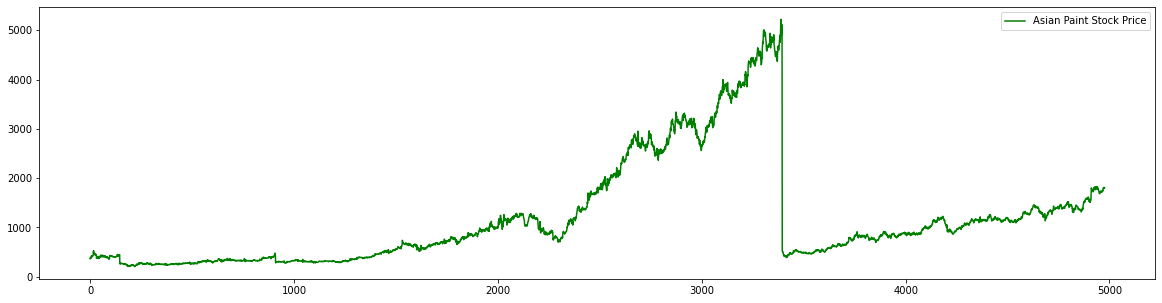

In [4]:
# PLOT 
plt.figure(figsize=(20,5))
plt.plot(new_training_set,color="green",label="Asian Paint Stock Price")
plt.legend()
plt.show()

In [0]:
# FEATURE SCALING 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_training_set = sc.fit_transform(new_training_set)

In [0]:
# CREATING INPUT DATA STREAM
x_train = new_training_set[:]
x_new_train=[]
y_train=[]
for i in range(0,3000):
    x_new_train.append([x_train[i:i+50]])
    y_train.append(x_train[i+50])


x_train = np.reshape(x_new_train,(3000,50,1))
y_train = np.array(y_train)

In [0]:
# BUILDING THE MODEL
model = Sequential()

model.add(LSTM(1000,input_shape=(50,1),return_sequences=True))
model.add(LSTM(500))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(1))

In [0]:
# COMPILING MODEL 
model.compile(optimizer="adam",loss="mean_squared_error")

In [9]:
# STRUCTURE OF THE MODEL
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 1000)          4008000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 500)               3002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 7,074,257
Trainable params: 7,074,257
Non-trainable params: 0
_________________________________________________________________


In [10]:
# TRAINING THE MODEL ON THE TRAINING SET
model.fit(x_train,y_train,batch_size=128,epochs=200)

Epoch 1/200
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0130
Epoch 2/200
3000/3000 [==============================] - 6s 2ms/step - loss: 3.8055e-04
Epoch 3/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.3655e-04
Epoch 4/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.3507e-04
Epoch 5/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.1999e-04
Epoch 6/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.2066e-04
Epoch 7/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.1884e-04
Epoch 8/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.2312e-04
Epoch 9/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.0746e-04
Epoch 10/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.1388e-04
Epoch 11/200
3000/3000 [==============================] - 6s 2ms/step - loss: 1.1308e-04
Epoch 12/200
3000/3000 [==========

In [0]:
# SAVING THE MODEL
model.save("model.h5")

# ***PREDICTIONS***

In [0]:
# IMPORTING LIBRARIES
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
# LOADING SAVED MODEL
model = load_model("model.h5")

In [29]:
# DATA PREPROCESSING AND CLEANING
test_set = pd.read_csv('ASIANPAINT.csv')
dates = test_set.iloc[:,0:1].values
test_set = test_set.iloc[:,1:2].values #open prices
len(test_set)
test_set #2D array 
test_set = test_set[~np.isnan(test_set)]
test_set #1D array
len(test_set)
new_test_set = [[i] for i in test_set] #converting back to 2D array
new_test_set = np.array(new_test_set) 
len(new_test_set)

4977

In [0]:
# NORMALIZATION
sc = MinMaxScaler()
new_test_set = sc.fit_transform(new_test_set)

In [0]:
# CREATING INPUT STREAM OF DATA 
x_train = new_test_set[:]
x_test=[]
y_test=[]
for i in range(3000,4927):
    x_test.append([x_train[i:i+50]])
    y_test.append(x_train[i+50])

x_test=np.reshape(x_test,(1927,50,1))
y_test=np.array(y_test)

In [0]:
dates = dates[3050:4977]

In [0]:
# PREDICTION 
pred = model.predict(x_test)

In [0]:
# GETTING INVERSE TRANSFORMED VALUES OF PREDICTIONS 
pred = sc.inverse_transform(pred)
y_test = sc.inverse_transform(y_test)

In [35]:
pred

array([[3146.1348],
       [3173.601 ],
       [3196.951 ],
       ...,
       [1785.317 ],
       [1791.8711],
       [1793.3339]], dtype=float32)

In [36]:
y_test

array([[3225.],
       [3250.],
       [3230.],
       ...,
       [1811.],
       [1810.],
       [1805.]])

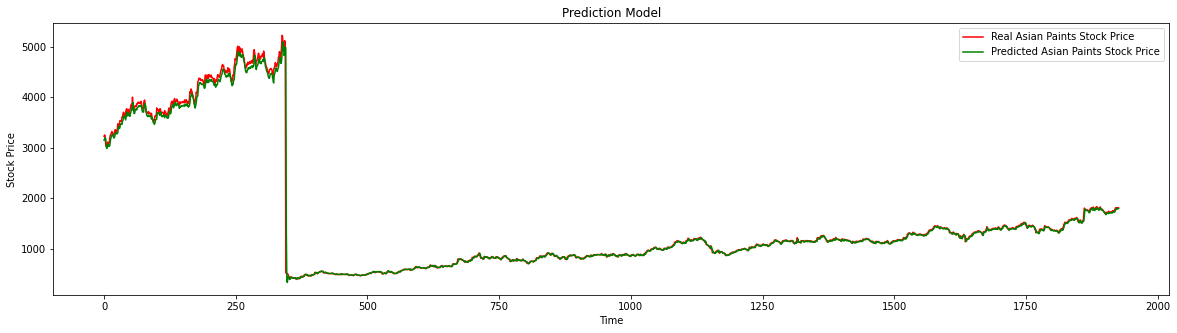

In [37]:
# VISUALIZATION OF PREDICTIONS VS REAL DATA
plt.figure(figsize=(20,5))
plt.plot(y_test,color="red",label="Real Asian Paints Stock Price")
plt.plot(pred,color="green",label="Predicted Asian Paints Stock Price")
plt.title("Prediction Model")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()    
plt.show()

In [38]:
# CALCULATION OF RMSE VALUE
rmse = math.sqrt(mean_squared_error(y_test,pred))
print("rmse is:", '{0:.2f}'.format((rmse/1927)*100),"%")

rmse is: 5.92 %


# UNSUPERVISED LEARNING: *Prediction of Far Future*

In [0]:
# DATA PREPROCESSING AND CLEANING
test_set = pd.read_csv('ASIANPAINT.csv')
test_open = test_set.iloc[:,4:5].values #open prices
test_dates = test_set.iloc[:,0:1].values #dates


In [0]:
# PREDICTING STOCKS FROM start TO end INDICES in batches of 50 and considering previous 10 samples 
def new_predicting(test_open,start,end):
    for i in range(start,end):
        x_test = []
        # NORMALIZATION
        sc = MinMaxScaler()
        new_test_open = sc.fit_transform(test_open)
        # CREATING INPUT STREAM OF DATA
        for j in range(i,i+10):
            x_test.append([new_test_open[i:i+50]])
        x_test = np.reshape(x_test,(10,50,1))
        # PREDICTION
        pred = model.predict(x_test)
        pred = sc.inverse_transform(pred)
        # UPDATING TESTSET WITH THE PREDICTED VALUE 
        im_test_open = [i[0] for i in test_open]
        im_test_open.append(pred[0][0])
        test_open = []
        test_open = [[i] for i in im_test_open]
    return test_open   

start = 3000
end = 6000
new = new_predicting(test_open,start,end)


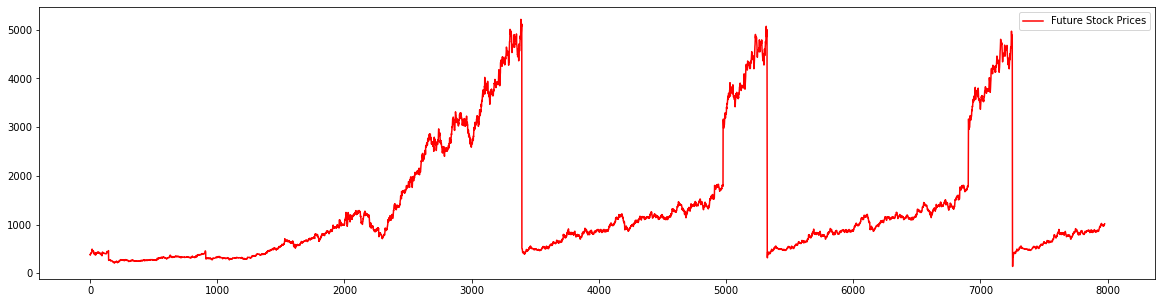

In [41]:
plt.figure(figsize=(20,5))
plt.plot(new,color="red",label="Future Stock Prices")
plt.legend()
plt.show()